# Installing Dependencies

In [2]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

In [23]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [35]:
IMAGE_PATH = 'MichiganDailyParagraph.jpg'

In [36]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[36, 20], [88, 20], [88, 46], [36, 46]], 'Only', 0.9999301433563232),
 ([[96, 20], [138, 20], [138, 44], [96, 44]], 'five', 0.9999693036079407),
 ([[158, 20], [230, 20], [230, 44], [158, 44]], 'deaths', 0.9999882225731557),
 ([[248, 20], [302, 20], [302, 44], [248, 44]], 'have', 0.9998981952667236),
 ([[320, 18], [414, 18], [414, 42], [320, 42]],
  'occurred',
  0.9999055840140461),
 ([[14, 44], [208, 44], [208, 72], [14, 72]],
  'since Saturday in',
  0.6349760441780495),
 ([[214, 46], [252, 46], [252, 70], [214, 70]], 'the', 0.899989902973175),
 ([[258, 46], [282, 46], [282, 70], [258, 70]], '8.', 0.5828172721345516),
 ([[288, 44], [312, 44], [312, 68], [288, 68]], 'A', 0.9974451906360606),
 ([[322, 44], [382, 44], [382, 68], [322, 68]], 'T. C.', 0.49760805550307546),
 ([[389, 51], [415, 51], [415, 67], [389, 67]], 'as', 0.7152231912440644),
 ([[16, 68], [414, 68], [414, 96], [16, 96]],
  'a result of the influenza epidemic and',
  0.8408292566238574),
 ([[12, 98], [62, 98], [62, 

In [27]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

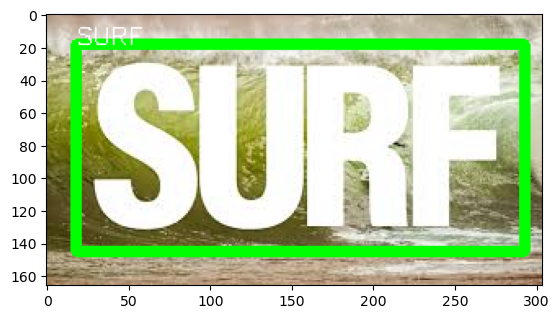

In [30]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left,font,.5,(255,255,255))
plt.imshow(img)
plt.show()

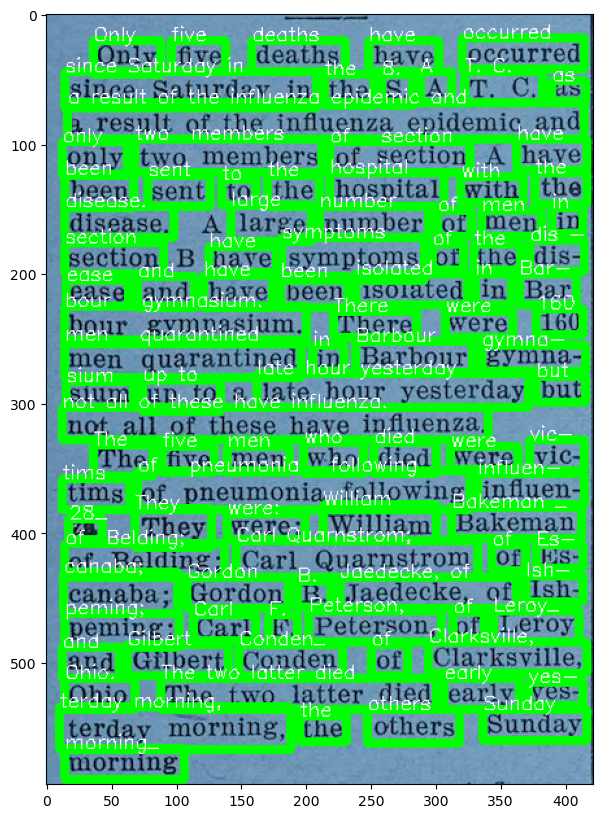

In [38]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img = cv2.putText(img,text,top_left,font,.5,(255,255,255))
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
    
